
<div style="text-align:center"><font size=6><b>EJERCICIOS SEABORN</b></font></div>

<div style="text-align:center"><img src="https://media4.giphy.com/media/vf3LO38xXNRrq/giphy.gif?cid=ecf05e47cl9pyl4yub1755skxt1tbhfl1359573ak9cd4d1n&rid=giphy.gif" /></div>


### 1. Importa pandas, pyplot y seaborn

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Activa matplotlib de forma estática (eso del ``inline``)

In [2]:
%matplotlib inline

### 3. Lee 'Pokemon.csv', dentro de la carpeta ``data`` algunos niveles más arriba, y lee la primera columna del csv como índice del DataFrame

In [3]:
import pandas as pd
df = pd.read_csv("../../../data/Pokemon.csv", encoding='latin1')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


### 4. Muestra las primeras filas del dataset para hacerte una idea de los datos cargados

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 5. Haz un gráfico de dispersión con ``lmplot()``, que es un método que además pinta una regresión lineal, para representar cómo varía el Ataque (eje X) en función de la Defensa (eje Y)

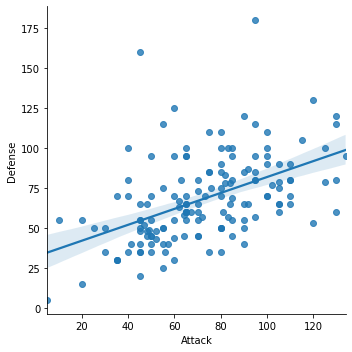

In [5]:
sns.lmplot(data=df, x='Attack', y='Defense')

¿Se ajusta bien? ¿No? Al fin y al cabo, lo que estamos haciendo es ver la relación lineal entre Ataque y Defensa, ¿podrías cuantificar esta relación de alguna manera y justificar así lo que acabas de ver?

In [6]:
df[['Attack', 'Defense']].corr().loc['Attack', 'Defense']

0.4919654602666427

### 6. No queremos ver la línea recta del modelo de regresión lineal que relaciona Ataque y Defensa

Prueba a consultar la [documentación](https://seaborn.pydata.org/generated/seaborn.lmplot.html) para ver qué parámetro debes modificar:

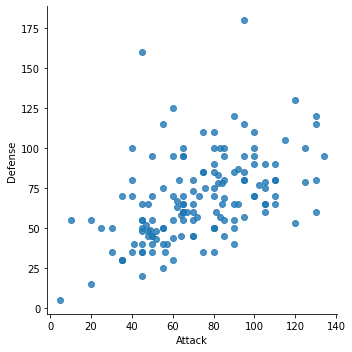

In [7]:
sns.lmplot('Attack', 'Defense', data=df, fit_reg=False)

### 7. Ahora queremos añadir otra dimensión más a nuestro gráfico, queremos ver el Stage junto con el Ataque y la Defensa

Consulta la documentación (o básate en lo que hemos visto en clase en otros métodos) para representar Stage con el color:

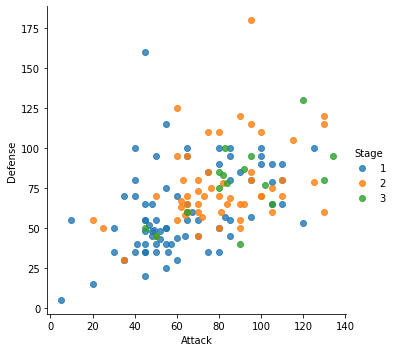

In [8]:
sns.lmplot('Attack', 'Defense', data=df, fit_reg=False, hue='Stage')

Limita ahora esta representación entre los valores 20 y 80 de Ataque. Para hacerlo, puede que no exista un parámetro en la documentación, y que lo tengas que hacer por otras vías:

<Figure size 1080x1080 with 0 Axes>

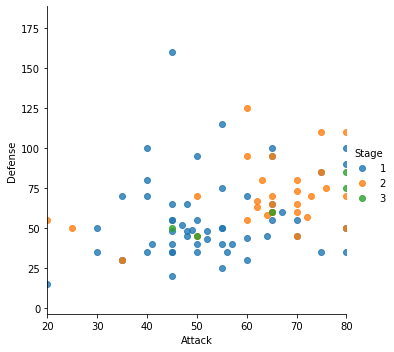

In [9]:
fig = plt.figure(figsize=(15,15))
ax = sns.lmplot(data=df, x= 'Attack', y='Defense', fit_reg=False, hue='Stage')
plt.xlim(20,80);

### 8. Con las 3 gráficas juntas no seaprecian muy bien las relaciones, separa la gráfica en otras 3: una por cada valor de Stage

Para ello, puedes comprobar cómo lo hemos hecho en el notebook anterior (aunque fuera para otro método de representación), cuando utilizábamos un parámetro para que nos dividiera las gráficas en función de su valor. Si no, también puedes consultar la documentación.

(En este caso, no mantengas los límites del último apartado)

<Figure size 1080x1080 with 0 Axes>

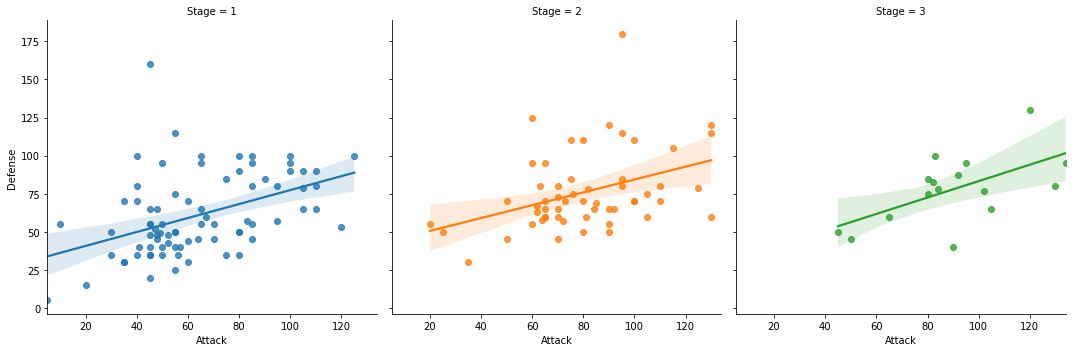

In [17]:
fig = plt.figure(figsize=(15,15))
ax = sns.lmplot(data=df, x= 'Attack', y='Defense', col='Stage', hue='Stage')

Comprueba ahora, para cada uno de ellos, si alguno tiene una relación lineal lo suficientemente buena como para considerar que existe esta relación (establece el umbral en +/-0.7).

Para ello, utiliza lo que hemos visto con Pandas para separar el Dataframe.

In [16]:
print(df[df['Stage']==1].corr().loc['Attack', 'Defense'])
print(df[df['Stage']==2].corr().loc['Attack', 'Defense'])
print(df[df['Stage']==3].corr().loc['Attack', 'Defense'])

0.44008756997217924
0.3911298116183662
0.5943040819362854


### 9. Dibuja un diagrama de cajas con el dataframe

¿De qué? Pues de todo lo que puedas.

In [20]:
df.dtypes

#             int64
Name         object
Type 1       object
Type 2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object

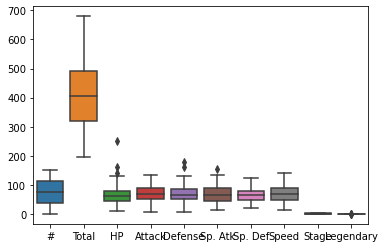

In [18]:
sns.boxplot(data=df)

### 10. Como puedes observar, representar todo lo que podemos quizás no sea la mejor idea.

Parece que las columnas Total, Stage y Legendary nos desvirtúan lo que estamos viendo, y la columna # tampoco parece que nos vaya a aportar mucho. Vuelve a dibujar los diagramas de caja sin incluirlas:

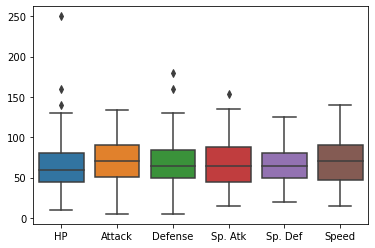

In [25]:
sns.boxplot(data=df.loc[:, 'HP':'Speed'])

In [ ]:
sns.boxplot(data=df)

### 11. Dejemos los gráficos al lado por un momento. ¿Cuántos 'Type 1' diferentes hay en el DataFrame? ¿Cuáles? ¿Cuántos registros existen de cada tipo?

Si puedes, hazlo con una sola instrucción que nos de toda esa información.

In [26]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

### 12. Quédate del Dataframe solo con los 'Type 1' que tengan más de 7 registros. ¿En cuáles de ellos puedes apreciar relación lineal entre el Ataque y la Defensa? (Umbral 0.7)

In [50]:
tipos = df['Type 1'].value_counts().apply(lambda x: x > 7)
df_join = tipos[tipos == True]
df_cruce = df.set_index("Type 1").join(df_join)

In [57]:
df_cruce[df_cruce['Type 1'].notnull()]

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Type 1
Bug,10,Caterpie,NaN,195,45,30,35,20,20,45,1,False,True
Bug,11,Metapod,NaN,205,50,20,55,25,25,30,2,False,True
Bug,12,Butterfree,Flying,395,60,45,50,90,80,70,3,False,True
Bug,13,Weedle,Poison,195,40,35,30,20,20,50,1,False,True
Bug,14,Kakuna,Poison,205,45,25,50,25,25,35,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water,121,Starmie,Psychic,520,60,75,85,100,85,115,2,False,True
Water,129,Magikarp,NaN,200,20,10,55,15,20,80,1,False,True
Water,130,Gyarados,Flying,540,95,125,79,60,100,81,2,False,True
Water,131,Lapras,Ice,535,130,85,80,85,95,60,1,False,True


In [49]:
df_join

Water       True
Normal      True
Poison      True
Fire        True
Grass       True
Bug         True
Electric    True
Rock        True
Ground      True
Psychic     True
Name: Type 1, dtype: bool

In [58]:
tipos = df['Type 1'].value_counts().apply(lambda x: x > 7)
tipos = tipos[tipos == True].index
df_type = df[df['Type 1'].apply(lambda x: x in tipos)]

tipos_corr = []
for tipo in tipos:
    if df_type[df_type['Type 1']==tipo][['Attack', 'Defense']].corr().loc['Attack', 'Defense'] >= 0.7:
        tipos_corr.append(tipo)
        
tipos_corr

df_type

for i in df_type['Type 1'].unique():
    df_type_2 = df_type[df_type['Type 1'] == i]
    if round(df_type_2[['Attack', 'Defense']].corr().loc['Attack', 'Defense'], 4) > 0.7:
        sns.set_style("whitegrid")
        a = sns.pairplot(df_type_2[['Attack', 'Defense', 'HP']],
                kind='reg')
        a.fig.suptitle(i, y = 1.05);
        
        

['Normal', 'Bug', 'Psychic']

In [38]:
# tipos_corr = []
# for tipo in tipos:
#     corr_value = df_type[df_type['Type 1']==tipo][['Attack', 'Defense']].corr().loc['Attack', 'Defense']
#     if corr_value >= 0.7:
#         tipos_corr.append((tipo, corr_value))
        
# tipos_corr

[('Normal', 0.7594030751714381),
 ('Bug', 0.7702949136184848),
 ('Psychic', 0.9380032898459318)]

### 13. Usa un estilo 'whitegrid' y representa un correlograma de las estadísticas Ataque, Defensa y HP, para cada uno de los tipos que has obtenido en el último ejercicio

Para cambiar el estulo, puedes consultar este apartado de la [documentación](http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme). Y los correlogramas deberán representar también la regresión lineal.

AAAAAA


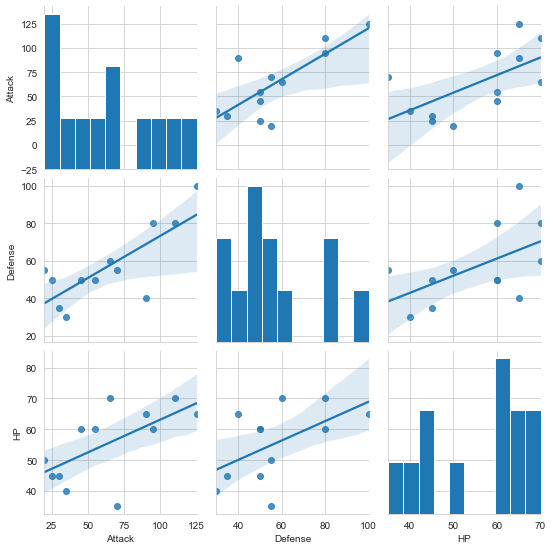

AAAAAA


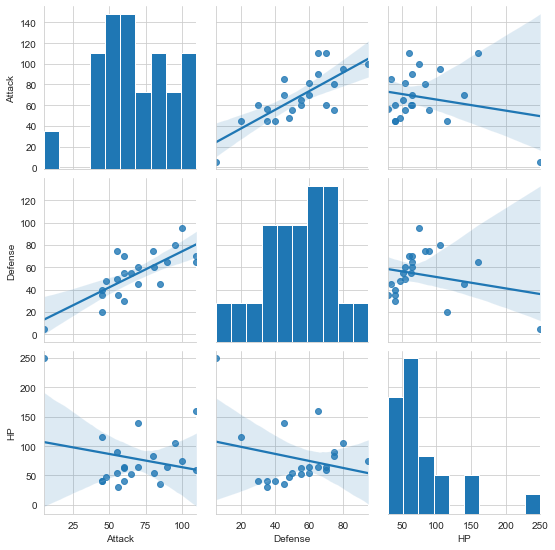

AAAAAA


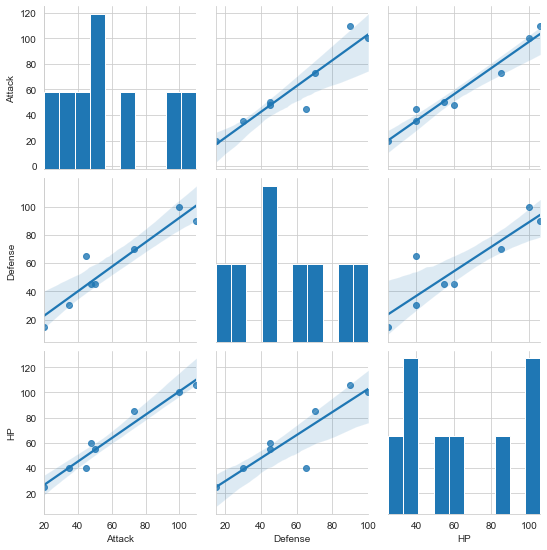

In [71]:
df_type

for i in df_type['Type 1'].unique():
    df_type_2 = df_type[df_type['Type 1'] == i]
    if round(df_type_2[['Attack', 'Defense']].corr().loc['Attack', 'Defense'], 4) > 0.7:
        sns.set_style("whitegrid")
        a = sns.pairplot(df_type_2[['Attack', 'Defense', 'HP']],
                kind='reg')
        print("AAAAAA")
        plt.show()
        a.fig.suptitle(i, y = 1.05);

### 14. Representa las mismas relaciones que en el apartado anterior pero cuantificándolas en un mapa de calor:

Si hacemos un bucle for para representar varios mapas de calor, se sobreescribirán uno sobre otro, por lo que no se verán bien. Para por verlo en 3 gráficas diferentes, deberíamos crear una nueva figura en cada iteración del bucle for con la siguiente línea ``fig = plt.figure()``.

Por otra parte, si queremos fijar la barra de color, podemos utilizar un par de parámetros del método, descritos en la [documentación](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) (si vas por orden no tardarás mucho).

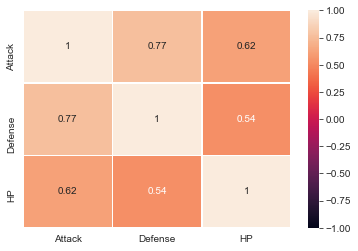

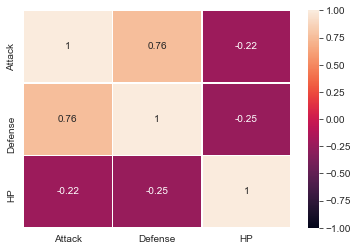

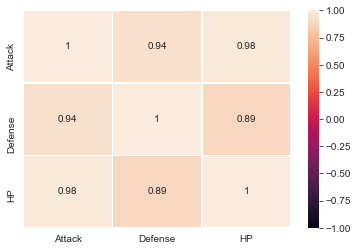

In [83]:
for i in df_type['Type 1'].unique():
    df_type_2 = df_type[df_type['Type 1'] == i]
    if round(df_type_2[['Attack', 'Defense']].corr().loc['Attack', 'Defense'], 4) > 0.7:
        fig = plt.figure()
        sns.heatmap(df_type_2[['Attack', 'Defense', 'HP']].corr(), annot=True, linewidth=.5, vmin=-1, vmax=1)

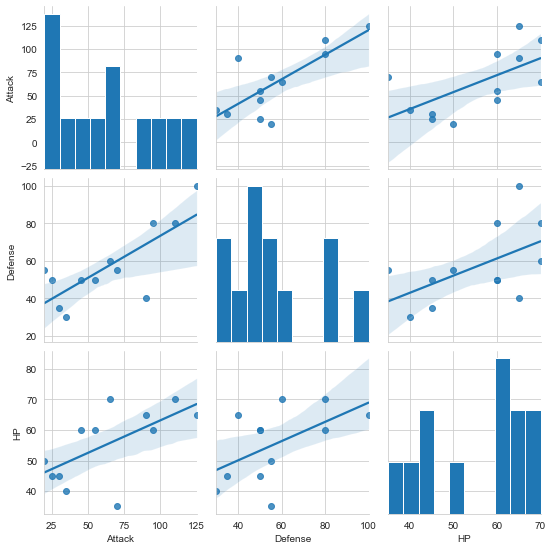

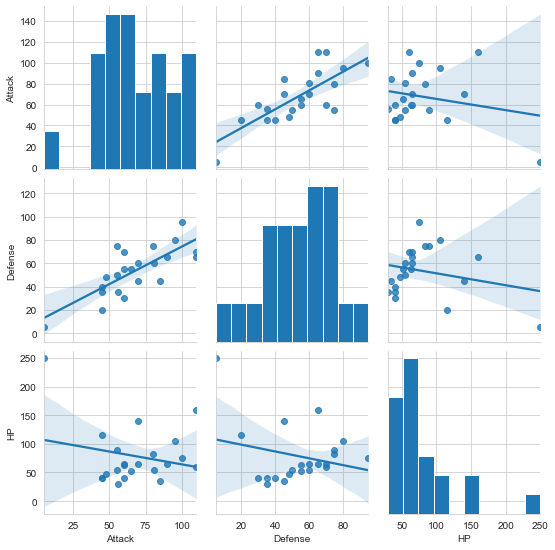

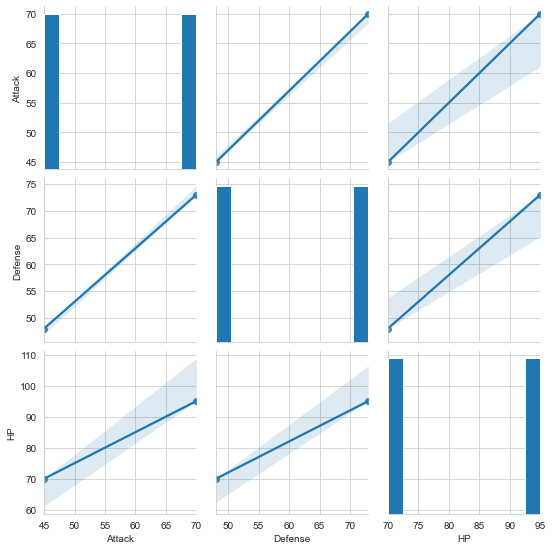

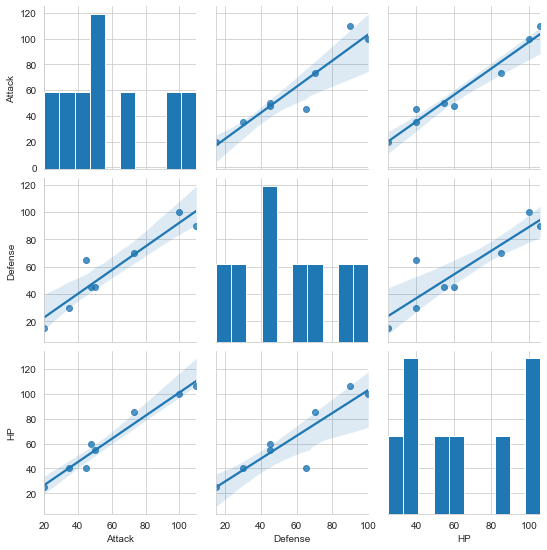

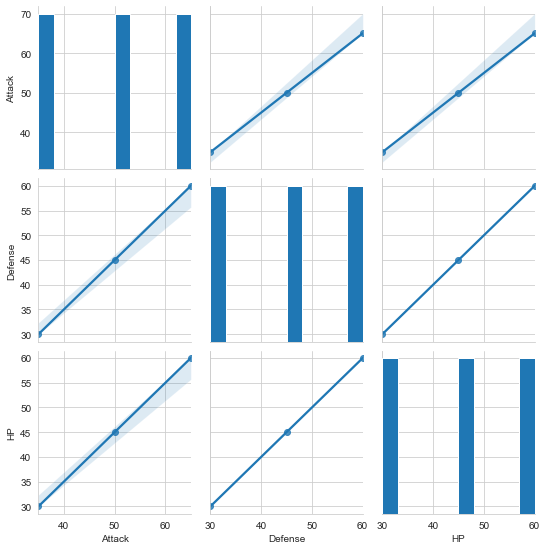

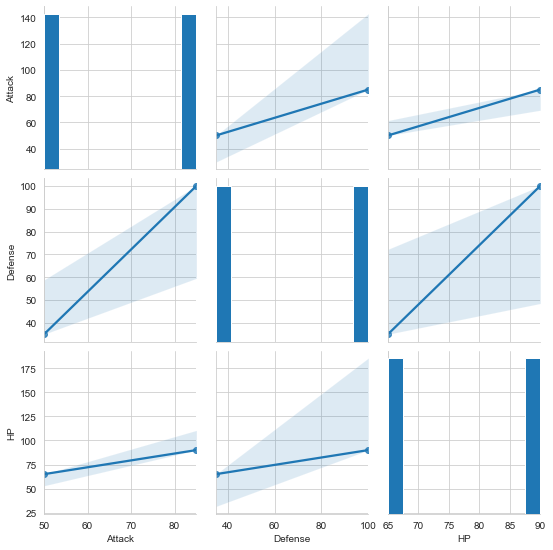

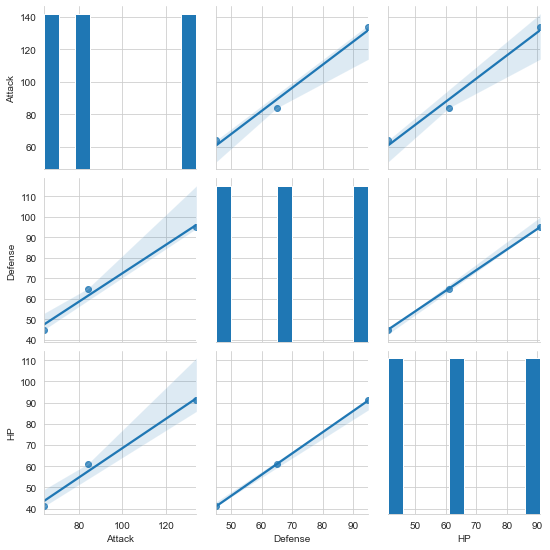

In [68]:
for i in df['Type 1'].unique():
    df_type_2 = df[df['Type 1'] == i]
    if round(df_type_2[['Attack', 'Defense']].corr().loc['Attack', 'Defense'], 4) > 0.7:
        fig = plt.figure()
        

### 15. Selecciona los tipos 'Grass', 'Fire' y 'Water', y refleja, en un diagrama de violín, el 'Type 1' (eje X) frente al Ataque (eje Y):

Para ello, utiliza la función ``catplot``.

### 16. Está bien, pero los colores no se corresponden con lo que uno espera para agua, fuego y planta

Para seleccionar los colores que quieras, puedes usar la paleta de colores mediante el siguiente parámetro:

``palette=sns.color_palette([color1, color2, color3, color4...])``

donde colorX es el color especificado como lo harías para cualquier otro gráfico. El tamaño de la lista de colores se debe corresponder conlos diferentes valores de lo que estés representando en el eje X.

Ahora que ya sabes, utiliza los colores aporpiados para cada uno

Repite este gráfico de forma que en cada violín se represente tanto el Ataque como la Defensa, para lo que deberás modificar el dataframe:

### 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.

Para ver esto, podemos usar swarmplot. Pinta el primero de los diagramas de violines del ejercicio anterior pero con un swarmplot en lugar de un violín, para lo que tendrás que cambiar un parámetro del ``catplot``

### 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 

Para ello, deberemos utilizar por separado ambas representaciones, no pudiéndolas combinar con catplot. Revisa cómo lo hemos hecho en el notebook anterior. Además, elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9


### 19. Veamos la función melt() de pandas. ``pd.melt()`` toma los valores de varias columnas y los junta todos en una misma columna nueva.

Dado un DataFrame, ``melt`` recibe varios parámetros:
  * qué columnas del DataFrame se quedan igual
  * qué nombres de columnas del dataframe pasan a ser una columna nueva
  * cómo queremos llamar esas nuevas columnas

Primero, crea un dataframe ``df_grass_fire_water`` quedándote con los valores de "Type 1": "Water", "Fire" y "Grass", y muestra las primeras filas para recordar su forma:

In [84]:
df_grass_fire_water = df[df['Type 1'].isin(["Grass", "Fire", "Water"])]
df_grass_fire_water.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 20. Queremos dejar igual las variables 'Name' y 'Type 1', así como añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'

Para llevar esto a cabo escribimos df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[columna1, columna2...], var_name='New Column')

donde \[columna1, columna2...\] es la lista con las columnas a apilar, que en este caso serán 'HP', 'Attack', 'Defense' y 'Speed'. Lo guardaremos en una variable llamada ``df_melted``

In [88]:
len(df_grass_fire_water[['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Speed']])

52

In [86]:
df_melted = df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=['HP', 'Attack', 'Defense', 'Speed'], var_name='New Column')

df_melted

,Name,Type 1,New Column,value
0,Bulbasaur,Grass,HP,45
1,Ivysaur,Grass,HP,60
2,Venusaur,Grass,HP,80
3,Charmander,Fire,HP,39
4,Charmeleon,Fire,HP,58
...,...,...,...,...
203,Gyarados,Water,Speed,81
204,Lapras,Water,Speed,60
205,Vaporeon,Water,Speed,65
206,Flareon,Fire,Speed,65


### 21. Pinta el swarmplot con el melted y entiende qué está pasando

¿Cómo lo has hecho? ¿Has utilizado ``catplot`` o directamente ``swarmplot``? Utiliza la contraria:

### 22. Basándote en el gráfico anterior, añade color en función del 'Type 1'

Para ello, utiliza el parámetro ``hue`` y usa la anterior paleta de colores Pokemon

Ahora, prueba qué ocurre al utilizar el parámetro ``dodge``:

### 23. Pinta el histograma y la densidad de probabilidad de la Defensa del dataframe original

### 24. Compara, en 3 gráficas diferentes, las densidades de probabilidad del Defensa (primera) y los histogramas del Ataque (segunda) para los que tienen 'Fire' como 'Type 1' frente a los que tienen "Water" y "Grass"

Respeta los colores que hemos usado con anterioridad y añade una leyenda

¿Cuál te parece mejor? Utilízala para comparar la Velocidad de estos 3 tipos:

### 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original

Para ello, utiliza ``sns.countplot``. Usa ``plt.xticks`` para rotar las etiquetas de los tipos. Si lo necesitas, fíjate en los ejemplos de [aquí](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html).

Además, muéstralos ordenados de mayor a menor, para ello, podrás utilizar el parámetro ``order`` del ``countplot``, al que deberás pasarle una lista de strings con los valores de la variable cualitativa.

### 26. Usa catplot para realizar 2 subplots: 1 (izquierda) para el Type 1 y otro (derecha) para el Type 2, donde se diferencie si es Legendary o no con el color

### 27. Muestra una función distribución de probabilidad conjunta de la Defensa respecto al Ataque.

Una vez lo tengas, identifica, apoximadamente, en qué bin 2D donde caen la mayoría de puntos (ataque, defensa).

Identifica las etiquetas de los ejes y ponle un título a la gráfica.

Realiza ahora la misma comparación pero de tal manera que se vean los puntos agrupados en bins de forma hexagonal, y que también se muestren los histogramas de cada una, todo en el mismo gráfico:

### 28. Selecciona los Pokémons 3, 149 y 150, y representa con gráficos de barras, en 3 figuras diferentes, los valores de los stats 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' del cada uno de estos Pokémon frente a los valores máximos para su Type 1:

Para construir el dataframe, recuerda que puedes utilizar la función ``pd.melt()``

### 29. Quédate con los Pokémon de Stage 3 y calcula la media de sus stats principales ('HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def' y 'Speed')

Representa, en un diagrama de violín, la suma de los stats de cada uno de ellos, marcando cada uno de los valores dentro del propio violín.

Ahora agrupa todos los pokémons de en función de su Stage (diferenciando, en el caso de que sea Stage 1, si es legendario o no; que sería otro grupo más), y representa la suma de sus stats en un diagrama de tarta. 

Quédate ahora con los que empiecen por "D" y representa, en un gráfico de donut, la media de sus totales en función del Tipo 1:

Finalmente, repítelo con todos los registros: